In [1]:
import pandas as pd
import numpy as np

In [71]:
df1 = pd.read_csv('CCES2016.csv', encoding = 'latin1', index_col = 'V101')
df2 = pd.read_csv('CCES2.csv', encoding = 'latin1', index_col = 'V101')
df3 = pd.read_csv('CCES3.csv', encoding = 'latin1', index_col = 'V101')

#df1 = pd.read_csv('CCES2016.csv', encoding = 'latin1')
#df2 = pd.read_csv('CCES2.csv', encoding = 'latin1')
#df3 = pd.read_csv('CCES3.csv', encoding = 'latin1')

#'utf-8' codec can't decode byte 0xe1 in position 5: unexpected end of data

df = df1.append(df2)
df = df.append(df3)

C:\Users\joshy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (50,51,52,53,54,55,271,333,370,410,411,412,413,414,415) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\joshy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (46,47,48,49,50,51,52,53,54,55,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,164,165,166,167,168,169,170,199,200,201,203,228,239,240,242,243,271,317,370,406,407,408,409,410,411,412,413,414,415) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\joshy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (46,47,48,49,50,51,52,53,54,55,271,305,309,313,315,317,319,331,333,363,364,365,367,368,370,371,373,374,375,376,377,378,379,380,381,382,383,385,386

In [79]:
df = df.reset_index()

In [80]:
df.head()

,V101,commonweight_vv,commonweight_vv_post,commonweight_vv_lgbt,commonweight,commonweight_post,tookpost,lookupzip,inputstate,cdid113,...,CL_E2016PPEP,CL_E2016PPVM,CL_E2016PEP,CL_E2016PVM,starttime_pre,endtime_pre,starttime_post,endtime_post,dma,dmaname
0,222168628,1.344214,1.042267,1.195346,0.944967,0.730450,Yes,3442,New Hampshire,2,...,NaN,NaN,NaN,NaN,05:44.9,36:38.8,24:32.9,40:18.8,NaN,NaN
1,273691199,1.182352,1.280103,1.280565,0.767256,0.892838,Yes,70118,Louisiana,2,...,NaN,NaN,NaN,NaN,54:58.5,20:41.7,02:55.1,09:26.9,622.0,NEW ORLEANS
2,284214415,0.217396,NaN,0.248930,0.090604,0.000000,No,63851,Missouri,8,...,NaN,NaN,NaN,NaN,54:12.8,24:44.8,NaN,NaN,632.0,PADUCAH-CAPE GIRARD-HARSBG
3,287557695,0.532320,NaN,0.928750,0.142583,0.000000,No,36703,Alabama,7,...,NaN,NaN,NaN,NaN,06:21.3,26:00.1,NaN,NaN,698.0,MONTGOMERY-SELMA
4,290387662,1.261106,1.092519,1.161894,1.206498,1.019007,Yes,80526,Colorado,2,...,NaN,NaN,NaN,NaN,56:31.1,14:12.2,09:28.0,21:05.9,751.0,DENVER


In [81]:
cumulative = pd.read_csv('cumulative16.csv', encoding = 'latin1')

In [82]:
cumulative.head()

,year,case_id,weight,weight_cumulative,state,st,cd,dist,dist_up,cong,...,voted_gov_chosen,voted_gov_fec,rep_current,rep_icpsr,sen1_current,sen1_icpsr,sen2_current,sen2_icpsr,gov_current,gov_fec
0,2016,222168628,1.344214,0.550899,New Hampshire,NH,NH-2,2,2,114,...,Chris Sununu (R),NaN,Ann McLane Kuster (D),21340.0,Jeanne Shaheen (D),40906.0,Kelly Ayotte (R),41106.0,Maggie Hassan (D),NaN
1,2016,273691199,1.182352,0.484563,Louisiana,LA,LA-2,2,2,114,...,NaN,NaN,Cedric Richmond (D),21137.0,David Vitter (R),29918.0,Bill Cassidy (R),20919.0,John Edwards (D),NaN
2,2016,284214415,0.217396,0.089095,Missouri,MO,MO-8,8,8,114,...,Chris Koster (D),NaN,Jason T. Smith (R),21373.0,Claire McCaskill (D),40701.0,Roy Blunt (R),29735.0,Jay Nixon (D),MO17619
3,2016,287557695,0.532320,0.218161,Alabama,AL,AL-7,7,7,114,...,NaN,NaN,Terri Sewell (D),21102.0,Richard Shelby (R),94659.0,Jeff Sessions (R),49700.0,Robert J. Bentley (R),AL3188
4,2016,290387662,1.261106,0.516839,Colorado,CO,CO-2,2,2,114,...,NaN,NaN,Jared Polis (D),20904.0,Michael Bennet (D),40910.0,Cory Gardner (R),21112.0,John Hickenlooper (D),CO143744


In [83]:
df['birthyr'] = cumulative['birthyr']

In [84]:
#ensure that case IDs match for both CSV files, and that the birth years are identical
different_index = []
for i in range(64600):
    if df['V101'].iloc[i] != cumulative['case_id'].iloc[i]:
        different_index.append(i)
        
different_year = []
for i in range(64600):
    if df['birthyr1'].iloc[i] != cumulative['birthyr'].iloc[i]:
        different_year.append((i, df['birthyr1'].iloc[i], cumulative['birthyr'].iloc[i] ))
        
print(len(different_index))
print(len(different_year))

0
0


In [48]:
columns_indices = []

for i in range(len(df.columns)):
    #if "ed" in df.columns[i]:
    columns_indices.append((i, df.columns[i]))
    
columns_indices = sorted(columns_indices, key = lambda x: x[1].lower())

for item in columns_indices:
    if item[0] < 10:
        print(str(item[0]) + "   " + str(item[1]))
    elif item[0] < 100:
        print(str(item[0]) + "  " + str(item[1]))
    else:
        print(str(item[0]) + " " + str(item[1]))

70  add_confirm
104 Asian_origin_1
113 Asian_origin_10
114 Asian_origin_11
115 Asian_origin_12
116 Asian_origin_13
117 Asian_origin_14
118 Asian_origin_15
105 Asian_origin_2
106 Asian_origin_3
107 Asian_origin_4
108 Asian_origin_5
109 Asian_origin_6
110 Asian_origin_7
111 Asian_origin_8
112 Asian_origin_9
119 Asian_origin_t
372 AskParty_post
75  birthyr
563 birthyr1
121 CC16_300_1
122 CC16_300_2
123 CC16_300_3
124 CC16_300_4
125 CC16_300_5
126 CC16_300_6
127 CC16_300b
128 CC16_300c
129 CC16_300d_1
130 CC16_300d_2
131 CC16_300d_3
132 CC16_300d_4
133 CC16_300d_5
134 CC16_301a
135 CC16_301b
136 CC16_301c
137 CC16_301d
138 CC16_301e
139 CC16_301f
140 CC16_301g
141 CC16_301h
142 CC16_301i
143 CC16_301j
144 CC16_301k
145 CC16_301l
146 CC16_301m
147 CC16_301n
148 CC16_301o
149 CC16_302
150 CC16_303
151 CC16_304
152 CC16_305_1
161 CC16_305_10
162 CC16_305_11
153 CC16_305_2
154 CC16_305_3
155 CC16_305_4
156 CC16_305_5
157 CC16_305_6
158 CC16_305_7
159 CC16_305_8
160 CC16_305_9
163 CC16_307
164 

In [31]:
df.groupby(['phone']).count()

,Unnamed: 0,V101,commonweight_vv,commonweight_vv_post,commonweight_vv_lgbt,commonweight,commonweight_post,tookpost,lookupzip,inputstate,...,CL_E2016PPEP,CL_E2016PPVM,CL_E2016PEP,CL_E2016PVM,starttime_pre,endtime_pre,starttime_post,endtime_post,dma,dmaname
phone,,,,,,,,,,,,,,,,,,,,,
Both,17413,17413,17413,16642,17264,17413,17413,17413,17413,17413,...,4759,8461,1209,3607,17413,17413,16620,16620,15779,15779
Cell only,12503,12503,12503,11504,12322,12503,12503,12503,12503,12503,...,2608,4571,590,1913,12503,12503,11491,11491,11791,11791
Landline,1314,1314,1314,1231,1289,1314,1314,1314,1314,1314,...,265,505,68,239,1314,1314,1230,1230,1200,1200
No phone,240,240,240,206,234,240,240,240,240,240,...,29,56,12,24,240,240,206,206,227,227


In [33]:
df.groupby(['pid7']).count()

,Unnamed: 0,V101,commonweight_vv,commonweight_vv_post,commonweight_vv_lgbt,commonweight,commonweight_post,tookpost,lookupzip,inputstate,...,CL_E2016PPEP,CL_E2016PPVM,CL_E2016PEP,CL_E2016PVM,starttime_pre,endtime_pre,starttime_post,endtime_post,dma,dmaname
pid7,,,,,,,,,,,,,,,,,,,,,
Independent,10493,10493,10493,8472,9244,10493,10493,10493,10493,10493,...,1234,2130,331,975,10493,10493,8464,8464,9523,9523
Lean Democrat,6270,6270,6270,5150,5562,6270,6270,6270,6270,6270,...,1157,1977,267,842,6270,6270,5146,5146,5636,5636
Lean Republican,5554,5554,5554,4881,5158,5554,5554,5554,5554,5554,...,1215,1965,291,817,5554,5554,4873,4873,5093,5093
Not sure,2067,2067,2067,1477,1685,2067,2067,2067,2067,2067,...,84,152,15,59,2067,2067,1477,1477,1907,1907
Not very strong Democrat,8618,8618,8618,6837,7446,8618,8618,8618,8618,8618,...,1311,2409,258,796,8618,8618,6830,6830,7955,7955
Not very strong Republican,6814,6814,6814,5814,6188,6814,6814,6814,6814,6814,...,1316,2313,262,859,6814,6814,5811,5811,6384,6384
Strong Democrat,16251,16251,16251,12955,14068,16251,16251,16251,16251,16251,...,3591,6438,789,2483,16251,16251,12946,12946,15000,15000
Strong Republican,8479,8479,8479,7316,7755,8479,8479,8479,8479,8479,...,1968,3587,489,1485,8479,8479,7312,7312,7983,7983


In [41]:
nan_counts = []
for col in df.columns:
    nan_counts.append((col, df[col].isnull().sum()))
    
nan_counts = sorted(nan_counts, key = lambda x: x[1], reverse = True)

for item in nan_counts:
    print(item)

('regzip', 64600)
('inputzip', 64600)
('birthyr', 64600)
('child18num', 64600)
('citylength_1', 64600)
('citylength_2', 64600)
('inputzip_post', 64600)
('regzip_post', 64600)
('AskParty_post', 64600)
('CC16_413_grid', 64600)
('CC16_417c', 64600)
('CC16_417d_1', 64600)
('CC16_417d_2', 64600)
('HouseCand9Name_post', 64506)
('HouseCand9Party_post', 64506)
('HouseCand10Name_post', 64506)
('HouseCand10Party_post', 64506)
('HouseCand11Name_post', 64506)
('HouseCand11Party_post', 64506)
('HouseCand9Name', 64477)
('HouseCand9Party', 64477)
('HouseCand10Name', 64477)
('HouseCand10Party', 64477)
('HouseCand11Name', 64477)
('HouseCand11Party', 64477)
('HouseCand7Name_post', 64435)
('HouseCand7Party_post', 64435)
('HouseCand8Name_post', 64435)
('HouseCand8Party_post', 64435)
('CC16_366x', 64419)
('HouseCand7Name', 64385)
('HouseCand7Party', 64385)
('HouseCand8Name', 64385)
('HouseCand8Party', 64385)
('religpew_advent', 64350)
('religpew_reformed', 64333)
('religpew_holiness', 64295)
('religpew_hin

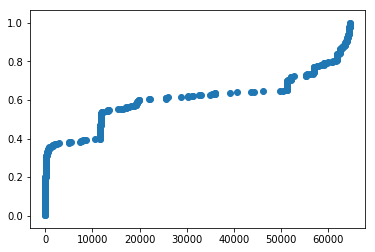

In [45]:
nans = [item[1] for item in nan_counts]

import matplotlib.pyplot as plt

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

x, y = ecdf(nans)

plt.scatter(x,y)
plt.show()

In [7]:
df.groupby(['CC16_312_1']).count()

,Unnamed: 0,V101,commonweight_vv,commonweight_vv_post,commonweight_vv_lgbt,commonweight,commonweight_post,tookpost,lookupzip,inputstate,...,CL_E2016PPEP,CL_E2016PPVM,CL_E2016PEP,CL_E2016PVM,starttime_pre,endtime_pre,starttime_post,endtime_post,dma,dmaname
CC16_312_1,,,,,,,,,,,,,,,,,,,,,
No,11798,11798,11798,11397,11653,11798,11798,11798,11798,11798,...,3074,5485,820,2402,11798,11798,11383,11383,10820,10820
Yes,1471,1471,1471,1361,1443,1471,1471,1471,1471,1471,...,249,440,67,189,1471,1471,1359,1359,1344,1344


In [111]:
#find the guy from New Hampshire

df[(df['birthyr1'] == 1990) & (df['inputstate'] == 'Indiana') 
   & (df['CC16_410a'].str.contains("Trump")) & (df['CC16_334a'] == 'Support') & (df['ideo5'] == 'Liberal')
  & (df['CC16_351K'] == 'For')]

,V101,commonweight_vv,commonweight_vv_post,commonweight_vv_lgbt,commonweight,commonweight_post,tookpost,lookupzip,inputstate,cdid113,...,CL_E2016PPVM,CL_E2016PEP,CL_E2016PVM,starttime_pre,endtime_pre,starttime_post,endtime_post,dma,dmaname,birthyr1
53803,304287721,3.281297,8.748644,5.506889,1.740127,4.972837,Yes,47006,Indiana,6,...,polling,NaN,NaN,40:39.9,04:58.2,06:28.1,11:38.6,515.0,CINCINNATI,1990


In [16]:
df.groupby(['tookpost']).count()

,Unnamed: 0,V101,commonweight_vv,commonweight_vv_post,commonweight_vv_lgbt,commonweight,commonweight_post,lookupzip,inputstate,cdid113,...,CL_E2016PPEP,CL_E2016PPVM,CL_E2016PEP,CL_E2016PVM,starttime_pre,endtime_pre,starttime_post,endtime_post,dma,dmaname
tookpost,,,,,,,,,,,,,,,,,,,,,
No,11701,11701,11701,43,4280,11701,11701,11701,11701,11701,...,1040,1786,204,576,11701,11701,0,0,10827,10827
Yes,52899,52899,52899,52899,52868,52899,52899,52899,52899,52899,...,10843,19195,2499,7742,52899,52899,52899,52899,48706,48706


52899 took the post survey